In [1]:
# убираем предупреждения
import warnings
warnings.filterwarnings('ignore')

# скрыть код со всех ячеек 
from IPython.core.display import HTML
HTML('<style>.input, .jp-InputArea {display: none !important}</style>')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

## имеем данные по каждому АЗС

### импортируем - АЗС 1

In [3]:
df1 = pd.read_excel("ass/Crimea_ass1.xlsx")

In [4]:
df1[:3]

,Unnamed: 0.1,Unnamed: 0,date,receipt,product,group_of_products,store,city,sold_quantity,tunover_no_VAT,tunover_VAT,purchase_price_VAT,purchase_cost_VAT,margin_VAT,profit,temperature
0,0,1,2017-09-21,5,"ИВ Лимонад Лаймони 0,6 л стекло","ВКУСОВАЯ, СЛАДКАЯ ВОДА, НАПИТКИ",АЗС № 1,Симферополь г,1,NaN,70.0,48.30,48.30,21.70,21.70,NaN
1,1,3,2017-09-21,6,"Вода Волна Байкала 0,5 л негаз",БЕЛАЯ ВОДА,АЗС № 1,Симферополь г,1,NaN,40.0,26.57,26.57,13.43,13.43,NaN
2,2,5,2017-09-21,7,"Вода Волна Байкала 0,5 л негаз",БЕЛАЯ ВОДА,АЗС № 1,Симферополь г,3,NaN,120.0,26.57,79.71,40.29,13.43,NaN


### группируем по дате и товару, 
#### считаем сумму выручки по товару
#### создаем столбец с месяцем 

In [5]:
data1 = df1.groupby(["date", "product"], as_index=True).agg(
   count = ("product","count"), profit = ("margin_VAT","sum")
).reset_index()

In [6]:
data1['month'] = data1['date'].dt.month
data1[:2]

,date,product,count,profit,month
0,2017-09-21,"Вода Волна Байкала 0,5 л негаз",8,161.16,9
1,2017-09-21,"Вода Крым Аква 1,5 л газ ПЭТ",2,31.50,9


# A B C
#### Группируем каждый товар
#### Считаем количество товаров
#### Выручка по каждому

In [7]:
df_abc1 = data1.groupby(["product"], as_index=True).agg(
   count = ("product","count"), profit = ("profit","sum")
).reset_index()
df_abc1[:2]

,product,count,profit
0,"AVS Влажные салфетки ""Для Салона"", 25 шт.",3,51.0
1,"AVS Влажные салфетки ""Для салона из кожи"", 25 шт.",6,102.0


## пишем функции, где считаем класс (A / B / С)
#### Группируем товар, сортируем, подсчитываем ранг, по условию присваиваем класс 

In [8]:
def ABC_analysis(df):
    grouped_df = (
            df.loc[:, ['product','profit']]
            .groupby('product')
            .sum()         
        )

    grouped_df = grouped_df.sort_values(by=['profit'], ascending=False)
    
    ## Ranking by importance
    grouped_df["Rank"] = grouped_df['profit'].rank(ascending = False)
    grouped_df["ABC"] = ' '
    grouped_df = grouped_df.reset_index()

    ## Checking the Importance of the Customers and Categorising into class A,B,C and splitting based on 20-30-50
    grouped_df['ABC'][0: int(0.2 * grouped_df['Rank'].max())] = 'A'
    grouped_df['ABC'][int(0.2 * grouped_df['Rank'].max()) : int(0.5 * grouped_df['Rank'].max())] = 'B'
    grouped_df['ABC'][int(0.5 * grouped_df['Rank'].max()): ] = 'C'                  
    
    return grouped_df


In [9]:
ABC_groups1 = ABC_analysis(df_abc1)
ABC_groups1[:3]

,product,profit,Rank,ABC
0,Кофе с молоком 160 мл АЗС № 11,172705.45,1.0,A
1,Кофе Американо 160 мл АЗС 11,152547.24,2.0,A
2,Омыватель зимний Мустанг 5 л,125707.82,3.0,A


### Посмотрим на объем каждой группы 

C    511
B    306
A    204
Name: ABC, dtype: int64

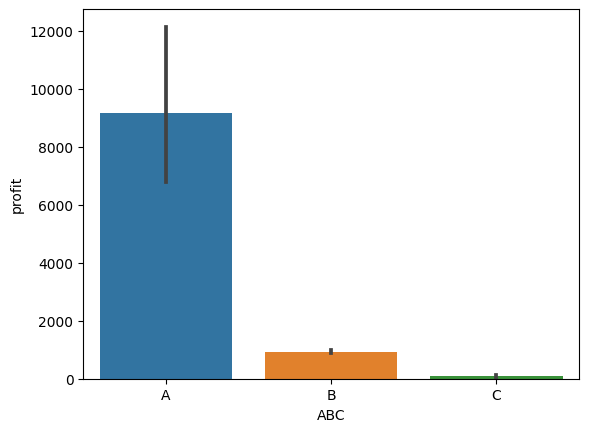

In [10]:
sns.barplot(x = 'ABC', y = 'profit',data = ABC_groups1)
ABC_groups1['ABC'].value_counts()

### вклад каждой группы – какой доход

In [11]:
ABC_groups1.groupby('ABC')['profit'].sum() / ABC_groups1['profit'].sum() * 100.

ABC
A    85.187226
B    12.925894
C     1.886880
Name: profit, dtype: float64

# x y z
##### убираем ненужные столбцы, группируем табор, считаем количество 
#####  разбиваем по месяцам, считаем стандартное отклонение спроса, общий спрос, средний месячный спрос
##### далее визуализируем и смотрим данные

In [12]:
df_xyz1 = data1.groupby(['product','month'])['count'].sum().to_frame().reset_index()

In [13]:
df_xyz1 = df_xyz1.pivot(index='product', columns='month', values='count').add_prefix('m').reset_index().fillna(0)

In [14]:
df_xyz1['Стандартное отклонение спроса'] = df_xyz1[['m1','m2','m3','m4','m5','m6',
            

SyntaxError: incomplete input (1453129381.py, line 2)

In [ ]:
df_xyz1 = df_xyz1.assign(Общий_спрос = df_xyz1['m1'] + df_xyz1['m2'] + \
                                                 df_xyz1['m3'] + df_xyz1['m4'] + \
                                                 df_xyz1['m5'] + df_xyz1['m6'] + \
                                                 df_xyz1['m7'] + df_xyz1['m8'] + \
                                                 df_xyz1['m9'] + df_xyz1['m10'] + \
                                                 df_xyz1['m11'] + df_xyz1['m12']
                                  )
df_xyz1[:4]

In [ ]:
df_xyz1 = df_xyz1.assign(Среднемесячный_спрос = df_xyz1['Общий_спрос'] / 12 )
df_xyz1['Коэффициент'] = df_xyz1['Стандартное отклонение спроса'] / df_xyz1['Среднемесячный_спрос']
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.distplot(df_xyz1['Коэффициент']).set_title("Коэффициент",fontsize=15)

#### По коэффициенту вариации спроса присваиваем класс. 
В случае данной АЗС, товары с коэффициентом 0,3 или ниже очень предсказуемы и имеют стабильные продажи в течение всего года, поэтому они относятся к классу X. Товары с коэффициентом от 0,3 до 0,6 менее предсказуемы и ими сложнее управлять, поэтому они относятся к классу Y. Наконец , все коэффициенты больше 0,6 относится к классу Z, так как его намного сложнее прогнозировать, и он подвержен колебаниям в течение года, он продается в случайном порядке.

In [ ]:
def xyz_classify_product1(cov):
    if cov <= 0.3:
        return 'X'
    elif cov > 0.3 and cov <= 0.6:
        return 'Y'
    else:
        return 'Z'
df_xyz1['xyz'] = df_xyz1['Коэффициент'].apply(xyz_classify_product1)
df_xyz1.xyz.value_counts()

### Объединяем две таблицы (ABC-XYZ), убираем ненужные столбцы. Экспортируем файл в формате Excel 

In [ ]:
merge1 = pd.merge(ABC_groups1, df_xyz1,
                       how='inner', on='product')
merge1 = merge1.drop(['Rank',  'm1', 'm2', 'm3', 'm4', 'm5', 'm6',
       'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'Стандартное отклонение спроса',
       'Общий_спрос', 'Среднемесячный_спрос', 'Коэффициент'], axis=1)
merge1 = merge1.rename(columns={ 'product':'Товар', 'profit': 'Доход', 'xyz': 'Класс_XYZ', 'ABC': 'Класс_ABC'})
merge1['Магазин'] = 'АЗС 1'

merge1.to_excel('fin/abc&xyz_Crimea_ass1.xlsx')

In [ ]:
merge1[:2]

Товары A - 20% товаров, приносят 70% дохода

Товары B - 30% товаров, приносят 25% выручки

Товары C - 50% товаров, приносят 5% дохода


Товары X: 
Товары, отнесенные к классу X, - это те, которые демонстрируют наименьшее изменение спроса. Продажи этих продуктов довольно постоянны, что означает, что менеджерам по закупкам легче прогнозировать их, и следует избегать нехватки запасов.

Товары Y: 
Товары, отнесенные к классу Y, более изменчивы, чем товары класса X. Спрос может меняться со временем из-за таких факторов, как сезонность, поэтому их сложнее точно прогнозировать.

Товары Z: 
Наконец, продукты класса Z сильно варьируются. Спрос растет и падает, и его действительно трудно предсказать, поэтому избежать нехватки запасов может быть действительно сложно, если только вы не сидите на больших запасах, которые не могут быстро оборачиваться.
